In [24]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import torch
from kan import KAN, create_dataset

In [25]:

# Load the dataset
df = pd.read_csv('diabetes_risk_prediction_dataset.csv')


In [26]:
df

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,Female,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No,Positive
516,48,Female,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,No,Positive
517,58,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,Yes,Positive
518,32,Female,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No,Negative


In [28]:

# Encode the target variable
encode = LabelEncoder()
df['class'] = encode.fit_transform(df['class'])

# Check class distribution and missing values
print(df['class'].value_counts())
print(df.isnull().sum())

class
1    320
0    200
Name: count, dtype: int64
Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64


In [29]:

# Fill missing values for numerical columns with the mean
df.fillna(df.select_dtypes(include=[np.number]).mean(), inplace=True)

In [31]:
# Define features and target
X = df[['Age', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity']]
y = df['class']

# One-hot encoding for categorical features
X_encoded = pd.get_dummies(X)

In [32]:

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert data to PyTorch tensors
train_input = torch.tensor(X_train_scaled, dtype=torch.float32)
train_label = torch.tensor(y_train.values, dtype=torch.float32).unsqueeze(1)
test_input = torch.tensor(X_test_scaled, dtype=torch.float32)
test_label = torch.tensor(y_test.values, dtype=torch.float32).unsqueeze(1)

# Check for NaNs and infinities in the data
assert not torch.isnan(train_input).any(), "NaNs found in train_input"
assert not torch.isnan(train_label).any(), "NaNs found in train_label"
assert not torch.isnan(test_input).any(), "NaNs found in test_input"
assert not torch.isnan(test_label).any(), "NaNs found in test_label"
assert not torch.isinf(train_input).any(), "Infs found in train_input"
assert not torch.isinf(train_label).any(), "Infs found in train_label"
assert not torch.isinf(test_input).any(), "Infs found in test_input"
assert not torch.isinf(test_label).any(), "Infs found in test_label"

# Prepare the dataset for KAN
dataset = {
    'train_input': train_input,
    'train_label': train_label,
    'test_input': test_input,
    'test_label': test_label
}

In [33]:
dataset

{'train_input': tensor([[ 0.3867, -1.0293,  1.0293,  ...,  1.3179,  0.4342, -0.4342],
         [-0.5957, -1.0293,  1.0293,  ..., -0.7588, -2.3028,  2.3028],
         [ 0.4685,  0.9716, -0.9716,  ...,  1.3179,  0.4342, -0.4342],
         ...,
         [-0.6775, -1.0293,  1.0293,  ..., -0.7588,  0.4342, -0.4342],
         [ 0.7141, -1.0293,  1.0293,  ..., -0.7588,  0.4342, -0.4342],
         [ 3.4156,  0.9716, -0.9716,  ...,  1.3179,  0.4342, -0.4342]]),
 'train_label': tensor([[1.],
         [1.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [1.],
         [0.],
         [0.],
         [0.],
         [1.],
         [0.],
         [0.],
         [1.],
         [0.],
         [1.],
         [1.],
         [1.],
         [1.],
         [1.],
         [1.],
         [1.],
         [0.],
         [1.],
         [0.],
         [1.],
         [1.],
         [1.],
         [1.],
         [0.],
         [1.],
         [1.],
         [1.],
         [0.],
   

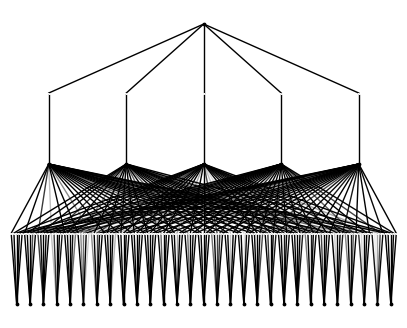

In [41]:

# Initialize KAN model
input_dim = train_input.shape[1]
output_dim = 1
model = KAN(width=[input_dim, 5, output_dim], grid=5, k=3, seed=0)

# Plot KAN at initialization
model(dataset['train_input'])
model.plot(beta=100)

In [43]:
def train_acc():
    return torch.mean((torch.round(model(dataset['train_input'])[:,0]) == dataset['train_label'][:,0]).float())

def test_acc():
    return torch.mean((torch.round(model(dataset['test_input'])[:,0]) == dataset['test_label'][:,0]).float())


results = model.train(dataset, opt="LBFGS", metrics=(train_acc, test_acc), steps=20, lamb=0.01, lamb_entropy=10.);
results['train_acc'][-1], results['test_acc'][-1]

train loss: 2.68e-01 | test loss: 3.20e-01 | reg: 5.20e+01 : 100%|██| 20/20 [00:31<00:00,  1.60s/it]


(0.9182692170143127, 0.8461538553237915)

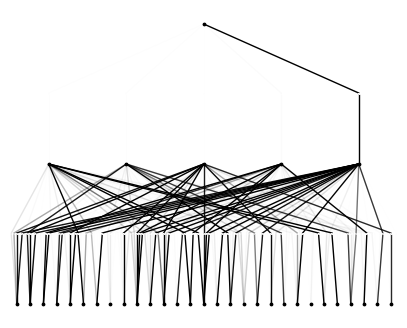

In [44]:
# Plot KAN after training
model(dataset['train_input'])
model.plot(beta=100)

In [ ]:
# You dont need to trin the model again with the same parameters !!


# # Continue training the model
# model.train(dataset, opt="LBFGS", steps=20, lamb=0.01, lamb_entropy=10.)

# # Plot trained KAN
# model.plot()

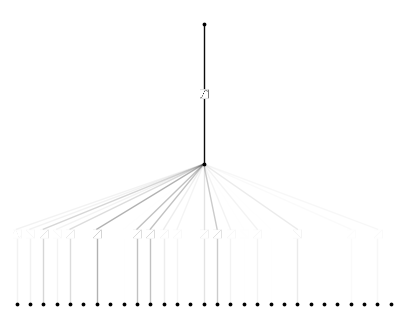

In [45]:
#Now lets prune the model

model = model.prune()
model(dataset['train_input'])
model.plot()

In [46]:
#Not sure why u need this either??



# # Further prune the model and continue training
# model = model.prune()
# model(dataset['train_input'])
# model.plot()
# model.train(dataset, opt="LBFGS", steps=50)
# model.plot()
# model.train(dataset, opt="LBFGS", steps=50)
# model.plot()

In [69]:
lib = ['x','x^2','x^3','x^4','exp','log','sqrt','tanh','sin','tan','abs']
model.auto_symbolic(lib=lib)

skipping (0,0,0) since already symbolic
skipping (0,1,0) since already symbolic
skipping (0,2,0) since already symbolic
skipping (0,3,0) since already symbolic
skipping (0,4,0) since already symbolic
skipping (0,5,0) since already symbolic
skipping (0,6,0) since already symbolic
skipping (0,7,0) since already symbolic
skipping (0,8,0) since already symbolic
skipping (0,9,0) since already symbolic
skipping (0,10,0) since already symbolic
skipping (0,11,0) since already symbolic
skipping (0,12,0) since already symbolic
skipping (0,13,0) since already symbolic
skipping (0,14,0) since already symbolic
skipping (0,15,0) since already symbolic
skipping (0,16,0) since already symbolic
skipping (0,17,0) since already symbolic
skipping (0,18,0) since already symbolic
skipping (0,19,0) since already symbolic
skipping (0,20,0) since already symbolic
skipping (0,21,0) since already symbolic
skipping (0,22,0) since already symbolic
skipping (0,23,0) since already symbolic
skipping (0,24,0) since al

In [70]:
#considering the model is already trained, you can get the symbolic formula based on the classification example in the pykan documentation

formula1,formula2 = model.symbolic_formula()[0]

ValueError: not enough values to unpack (expected 2, got 1)

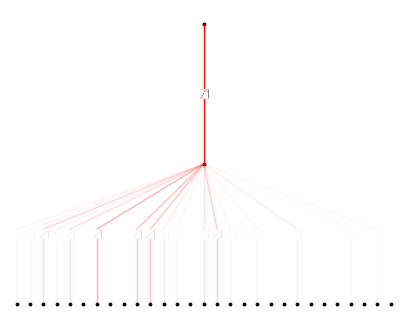

In [71]:
# Since the model has only one output, after pruning the model we can check again by plotting it.

model.plot()

In [72]:
# lets check the formula for the single output 

formula = model.symbolic_formula()[0][0]

In [78]:

formula


# we now have the formula for the model with the activation function as well lets try and gauge the accuracy of the formula 


0.58*sin(0.04*(1 - 0.9*x_15)**4 + 0.75*sqrt(1 - 0.69*x_5) - 0.1*(-x_7 - 0.92)**2 + 0.03*log(7.21 - 7.15*x_17) + 0.41*sin(0.97*x_1 + 5.6) + 0.14*tan(9.97*x_10 + 2.12) + 0.1*tan(8.01*x_11 - 3.94) + 0.42*tan(5.66*x_16 + 5.99) + 0.01*tan(2.44*x_2 - 8.41) - 0.01*tan(8.4*x_4 - 1.4) - 0.1*Abs(2.97*x_13 + 0.21) - 0.02*Abs(7.59*x_19 + 4.01) + 0.02*Abs(8.96*x_22 + 8.73) + 0.01*Abs(9.76*x_28 - 3.17) - 0.08*Abs(9.34*x_3 + 3.52) - 2.52) + 0.51

In [75]:
# how accurate is this formula?
def acc(formula, X, y):
    batch = X.shape[0]
    correct = 0
    for i in range(batch):
        correct += np.round(np.array(formula.subs('x_1', X[i,0]).subs('x_2', X[i,1])).astype(np.float64)) == y[i,0]
    return correct/batch

print('train acc of the formula:', acc(formula, dataset['train_input'], dataset['train_label']))
print('test acc of the formula:', acc(formula, dataset['test_input'], dataset['test_label']))


TypeError: Cannot convert expression to float

In [79]:
import numpy as np
import sympy as sp



def acc(formula, X, y):
    batch = X.shape[0]
    correct = 0
    for i in range(batch):
        # Create a dictionary for substitution
        subs_dict = {f'x_{j+1}': X[i, j] for j in range(X.shape[1])}
        
        # Substitute and evaluate the formula
        logit = formula.subs(subs_dict).evalf()
        
        # Convert to float if it's a Sympy Float
        if isinstance(logit, sp.Float):
            logit = float(logit)
        
        # Compare the logit with threshold 0.5
        correct += np.round(logit) == y[i, 0]
    
    return correct / batch

# Calculate accuracy on training and test sets
print('Train accuracy of the formula:', acc(formula, dataset['train_input'].numpy(), dataset['train_label'].numpy()))
print('Test accuracy of the formula:', acc(formula, dataset['test_input'].numpy(), dataset['test_label'].numpy()))


Train accuracy of the formula: 0.8942307692307693
Test accuracy of the formula: 0.8269230769230769
